# Exploratory Data Analysis: Student Academic Performance

**Author:** Jennifer Danielson  
**Course:** Data Fundamentals (Module 6 Project)  
**Dataset:** Students Academic Performance (Kaggle)

## Purpose
This notebook presents an exploratory data analysis (EDA) of student performance data. The goal is to explore patterns in academic outcomes (math, reading, and writing) and examine how factors such as test preparation and parental education relate to overall performance.


## Data Loading

The dataset used in this analysis is the *Students Academic Performance Dataset* obtained from Kaggle. The dataset was loaded into the notebook using the pandas library. It contains student demographic information along with math, reading, and writing exam scores, which serve as the primary measures of academic performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Overview

The dataset contains information on student academic performance along with demographic and educational background variables. Initial inspection shows the number of records, column data types, and summary statistics for numeric variables such as math, reading, and writing scores.


In [3]:
df.shape


(1000, 8)

In [4]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='str')

In [5]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 103.5 KB


In [6]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Data Preparation

Minimal data preparation was performed to improve consistency and usability. Column names were standardized by converting them to lowercase and replacing spaces and special characters with underscores. No extensive data cleaning was required for this dataset.

In [7]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("/", "_", regex=False)
)

df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='str')

In [8]:
df["average_score"] = (
    df["math_score"] +
    df["reading_score"] +
    df["writing_score"]
) / 3

df[["math_score", "reading_score", "writing_score", "average_score"]].head()


,math_score,reading_score,writing_score,average_score
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


## Feature Engineering

A new feature, **average_score**, was created by averaging math, reading, and writing scores for each student. This provides a single summary measure of overall academic performance that can be used for comparison across groups.


In [9]:
df["average_score"].describe()


count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: average_score, dtype: float64

## Distribution of Average Student Scores

To understand overall student performance, the distribution of the newly created **average_score** variable is examined. This visualization helps identify the central tendency, spread, and any potential skew in overall academic performance.


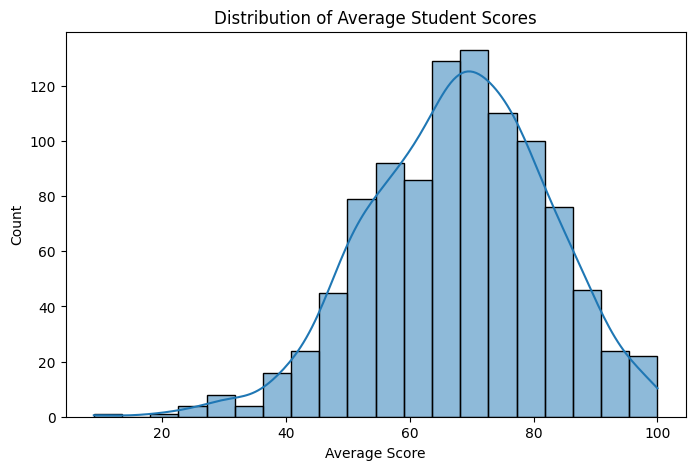

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["average_score"], bins=20, kde=True)
plt.title("Distribution of Average Student Scores")
plt.xlabel("Average Score")
plt.ylabel("Count")
plt.show()


## Average Score by Test Preparation Course

This visualization compares average student performance between those who completed a test preparation course and those who did not. It helps assess whether test preparation is associated with higher overall academic performance.


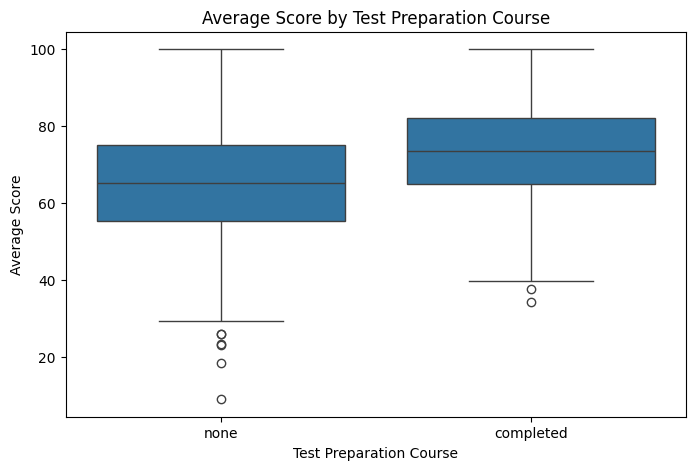

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="test_preparation_course",
    y="average_score"
)
plt.title("Average Score by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()


Students who completed the test preparation course tend to have higher average scores compared to those who did not. The median score is noticeably higher for students who completed the course, suggesting a positive association between test preparation and academic performance.


## Average Score by Parental Level of Education

This visualization examines how students’ average academic performance varies by the highest level of education attained by a parent. Understanding this relationship can provide insight into potential socioeconomic influences on student outcomes.


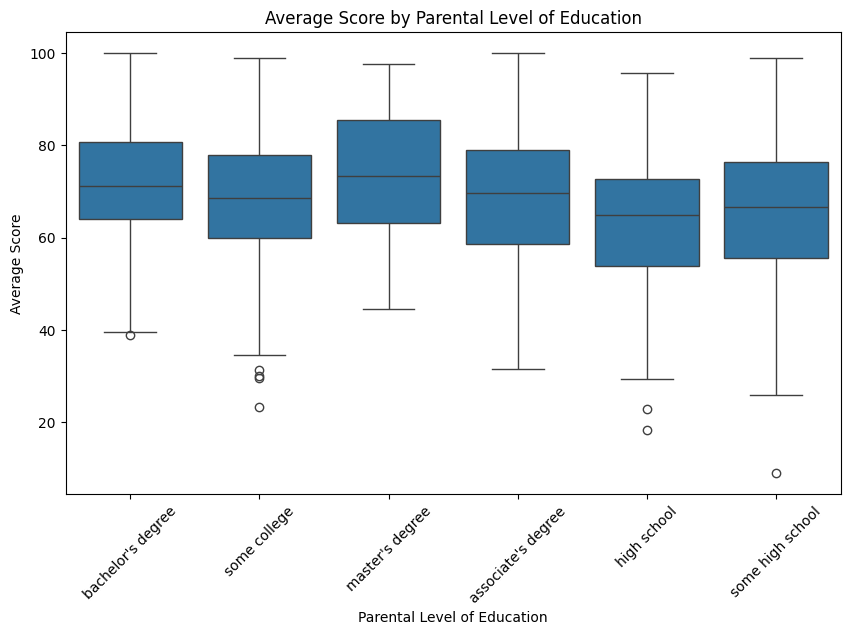

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="parental_level_of_education",
    y="average_score"
)
plt.xticks(rotation=45)
plt.title("Average Score by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.show()


Students whose parents have higher levels of education tend to show higher median average scores. While there is overlap across groups, the overall trend suggests a positive relationship between parental education level and student academic performance.


## Conclusion

This exploratory data analysis examined student academic performance using demographic and educational background variables. By creating a composite average score and visualizing its distribution across key groups, several patterns emerged.

Overall, students who completed a test preparation course and those whose parents attained higher levels of education tended to perform better on average. These findings highlight the importance of academic support and background factors in student achievement. This analysis demonstrates how exploratory techniques can uncover meaningful relationships within educational data.
